In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import cv2
# y 值轉成 one-hot encoding
from keras.utils import to_categorical

Using TensorFlow backend.
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [54]:
import os, shutil

# 解壓縮資料夾所在的目錄路徑
original_dataset_dir = r'photo1500' 
# 用來儲存少量資料集的目錄位置
base_dir = r'dataset' 
if not os.path.isdir(base_dir): os.mkdir(base_dir)  # 如果目錄不存在, 才建立目錄

# 分拆成訓練、驗證與測試目錄位置
train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir): os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')  
if not os.path.isdir(validation_dir): os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir): os.mkdir(test_dir)


# 複製前面 1000 張貓圖片到 train_dir 訓練目錄
fnames = ['{}.jpg'.format(i) for i in range(1100)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張貓圖片到 validation_dir 驗證目錄
fnames = ['{}.jpg'.format(i) for i in range(1100, 1450)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

# 複製下 500 張貓圖片到 test_dir 測試目錄
fnames = ['{}.jpg'.format(i) for i in range(1450, 1749)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

print('複製完成')

複製完成


In [2]:
train_dir = 'dataset/train'
v_dir = 'dataset/validation'

In [3]:
from keras.preprocessing import image
i=0
x_train = []
for num in range(1100):
    img_path = train_dir+'/'+str(num)+'.jpg'

    img = image.load_img(img_path, target_size=(150, 150))

    x = image.img_to_array(img)
    i+=1
    x_train.append(x)

In [4]:
i=0
x_test = []
for num in range(1100,1450):
    img_path = v_dir+'/'+str(num)+'.jpg'

    img = image.load_img(img_path, target_size=(150, 150))

    x = image.img_to_array(img)
    i+=1
    x_test.append(x)

In [5]:
import pandas as pd
df = pd.read_csv('label_all.csv')
y_train=[]
y_test = []
for i in range(1100):
    y_train.append(df.values[i][1])
    
for i in range(1100,1450):
    y_test.append(df.values[i][1])

In [6]:
num_classes = 243
# y 值轉成 one-hot encoding
y_train =to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

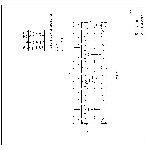

In [7]:
image.array_to_img(x_train[100])

In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_test.shape

(350, 243)

In [9]:
from keras import backend as K
img_rows, img_cols = 150, 150
# channels_first: 色彩通道(R/G/B)資料(深度)放在第2維度，第3、4維度放置寬與高
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else: # channels_last: 色彩通道(R/G/B)資料(深度)放在第4維度，第2、3維度放置寬與高
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

# 轉換色彩 0~255 資料為 0~1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()  # 查看模型摘要





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 128)  

In [11]:
from keras import optimizers
#model.compile(loss='sparse_categorical_crossentropy',
#              optimizer=optimizers.RMSprop(lr=1e-4),
#              metrics=['acc'])
model.compile(loss='MSE',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['MSE'])

In [27]:
train_history = model.fit(x_train, y_train,
          batch_size=20,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

ValueError: Error when checking target: expected dense_2 to have shape (1,) but got array with shape (243,)

In [10]:
from keras.layers import Conv2D,Dropout,Dense,MaxPooling2D,Flatten
from keras.models import Sequential
from keras import optimizers
# 建立簡單的線性執行的模型
model = Sequential()
# 建立卷積層，filter=32,即 output space 的深度, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 建立卷積層，filter=64,即 output size, Kernal Size: 3x3, activation function 採用 relu
model.add(Conv2D(64, (3, 3), activation='relu'))
# 建立池化層，池化大小=2x2，取最大值
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.25
model.add(Dropout(0.25))
# Flatten層把多維的輸入一維化，常用在從卷積層到全連接層的過渡。
model.add(Flatten())
# 全連接層: 128個output
model.add(Dense(128, activation='relu'))
# Dropout層隨機斷開輸入神經元，用於防止過度擬合，斷開比例:0.5
model.add(Dropout(0.5))
# 使用 softmax activation function，將結果分類
model.add(Dense(num_classes, activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0        

In [11]:

# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x_train, y_train,
          batch_size=20,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1100 samples, validate on 350 samples
Epoch 1/100
1100/1100 [==============================] - 5s 4ms/step - loss: 5.2831 - acc: 0.0282 - val_loss: 4.9907 - val_acc: 0.0257
Epoch 2/100
1100/1100 [==============================] - 2s 2ms/step - loss: 4.5136 - acc: 0.0445 - val_loss: 4.8225 - val_acc: 0.0000e+00
Epoch 3/100
1100/1100 [==============================] - 2s 2ms/step - loss: 4.2592 - acc: 0.0555 - val_loss: 5.0502 - val_acc: 0.0286
Epoch 4/100
1100/1100 [==============================] - 2s 2ms/step - loss: 4.0775 - acc: 0.0645 - val_loss: 4.9062 - val_acc: 0.0200
Epoch 5/100
1100/1100 [==============================] - 2s 2ms/step - loss: 3.9387 - acc: 0.0645 - val_loss: 4.8964 - val_acc: 0.0057
Epoch 6/100
1100/1100 [==============================] - 2s 2ms/step - loss: 3.7087 - acc: 0.0882 - val_loss: 5.0743 - val_acc: 0.0314
Epoch 7/100
1100/1100 [======================

1100/1100 [==============================] - 2s 2ms/step - loss: 0.1445 - acc: 0.9591 - val_loss: 11.4059 - val_acc: 0.0086
Epoch 59/100
1100/1100 [==============================] - 2s 2ms/step - loss: 0.1312 - acc: 0.9455 - val_loss: 11.9025 - val_acc: 0.0229
Epoch 60/100
1100/1100 [==============================] - 2s 2ms/step - loss: 0.1339 - acc: 0.9464 - val_loss: 11.4741 - val_acc: 0.0171
Epoch 61/100
1100/1100 [==============================] - 2s 2ms/step - loss: 0.1488 - acc: 0.9455 - val_loss: 10.0382 - val_acc: 0.0200
Epoch 62/100
1100/1100 [==============================] - 2s 2ms/step - loss: 0.1615 - acc: 0.9364 - val_loss: 10.6949 - val_acc: 0.0171
Epoch 63/100
1100/1100 [==============================] - 2s 2ms/step - loss: 0.1136 - acc: 0.9691 - val_loss: 12.2005 - val_acc: 0.0114
Epoch 64/100
1100/1100 [==============================] - 2s 2ms/step - loss: 0.1633 - acc: 0.9445 - val_loss: 10.1494 - val_acc: 0.0200
Epoch 65/100
1100/1100 [==============================

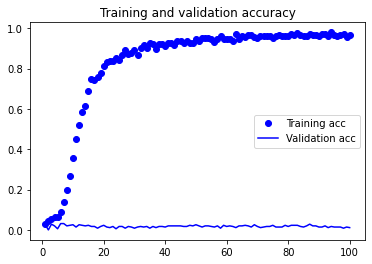

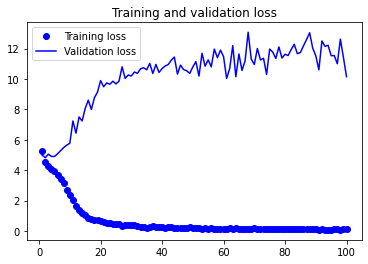

In [13]:
import matplotlib.pyplot as plt

acc = train_history.history['acc']
val_acc = train_history.history['val_acc']
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()